<a href="https://colab.research.google.com/github/jcampuzano1111/K-Means-Online-Retailes/blob/main/K_Means_cluster_online_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:20.2f}'.format

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


In [3]:
df = pd.read_excel("/content/drive/MyDrive/Collab/Online Retail/online_retail_II.xlsx", sheet_name=0)

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
for col in df:
    print(col)
    print(df[col].unique())
    print(f'Unique values {df[col].nunique()}')
    print("-"*110)

Invoice
[489434 489435 489436 ... 538169 538170 538171]
Unique values 28816
--------------------------------------------------------------------------------------------------------------
StockCode
[85048 '79323P' '79323W' ... 22935 22933 21120]
Unique values 4632
--------------------------------------------------------------------------------------------------------------
Description
['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... '*Boombox Ipod Classic' 'faulty'
 'Dotcom sales']
Unique values 4681
--------------------------------------------------------------------------------------------------------------
Quantity
[   12    48    24    10    18     3    16     4     2     6     8     1
    28    30    60    32    56     9    25    36    20   -12    -6    -4
   -24    -3    -2   576   288    27   -96    64   160  -240  -192     5
    -1    72    50    54   -50     7   800    11    58   192    96   144
   100   180   216    15   240    22   108  

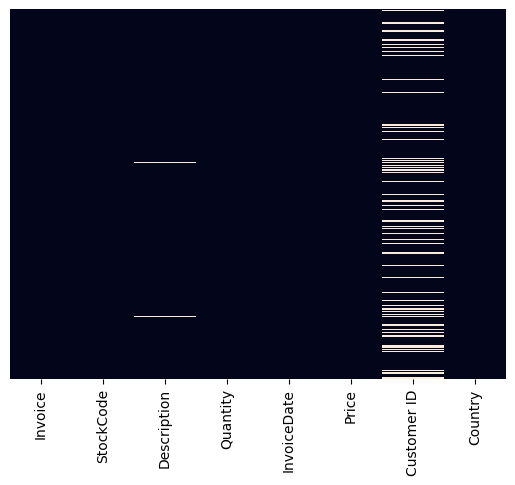

In [7]:
plt.figure()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False) #white is the missing data in columns
plt.show()

In [8]:
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
missing_summary = pd.DataFrame({"Missing": missing, "%": missing_pct})
print(missing_summary)

             Missing                    %
Customer ID   107927                20.54
Description     2928                 0.56
StockCode          0                 0.00
Invoice            0                 0.00
Quantity           0                 0.00
InvoiceDate        0                 0.00
Price              0                 0.00
Country            0                 0.00


In [9]:
df.isna().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [10]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [11]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [12]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [13]:
df[df['Quantity']<0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia


In [14]:
df['Invoice'].str.replace("[0-9]", "", regex=True).unique()

array([nan, 'C', 'A'], dtype=object)

In [15]:
df[df["Invoice"].astype(str).str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [16]:
df[df["Invoice"].astype(str).str.len() != 6]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [17]:
df["StockCode"] = df["StockCode"].astype(str)
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]$") == False)]["StockCode"].unique()

array(['POST', '79323LP', '15056BL', 'D', '79323GR', 'DCGS0058',
       'DCGS0068', 'DOT', '15056bl', 'M', 'DCGS0004', 'DCGS0076', 'C2',
       'BANK CHARGES', 'DCGS0003', 'TEST001', 'gift_0001_80', 'DCGS0072',
       'gift_0001_20', 'DCGS0044', 'TEST002', 'gift_0001_10',
       'gift_0001_50', 'DCGS0066N', 'gift_0001_30', 'PADS', '72024HC',
       'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [18]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [19]:
df[df["StockCode"].str.contains("^DCG")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2009-12-03 14:39:00,17.35,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-03 14:39:00,16.48,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
466308,533348,DCGSSBOY,BOYS PARTY BAG,1,2010-11-17 09:23:00,3.36,NaN,United Kingdom
478086,534289,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-22 11:25:00,2.51,NaN,United Kingdom
496962,535835,DCGSSBOY,BOYS PARTY BAG,3,2010-11-29 09:46:00,3.36,NaN,United Kingdom
496963,535835,DCGSSGIRL,GIRLS PARTY BAG,3,2010-11-29 09:46:00,3.36,NaN,United Kingdom


In [20]:
df.duplicated().sum()

np.int64(6865)

In [21]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Month_Name"] = df["InvoiceDate"].dt.month_name()
df["Day"] = df["InvoiceDate"].dt.day
df["Weekday"] = df["InvoiceDate"].dt.day_name()

# DATA CLEANING


In [22]:
cleaned_df = df.copy()

In [23]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Month_Name,Day,Weekday
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,2009,12,December,1,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,2009,12,December,1,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,2009,12,December,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,2010,12,December,9,Thursday
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,2010,12,December,9,Thursday
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,2010,12,December,9,Thursday
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,2010,12,December,9,Thursday


In [24]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

In [25]:
mask = (cleaned_df["Invoice"].str.match("^\\d{6}$") == True)

In [26]:
cleaned_df = cleaned_df[mask]

In [27]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Month_Name,Day,Weekday
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,2009,12,December,1,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,2009,12,December,1,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,2009,12,December,1,Tuesday


In [43]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

In [44]:
mask = (cleaned_df["StockCode"].str.match("^\\d{5}$") == True) | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True) | (cleaned_df["StockCode"].str.match("^PADS$") == True)

In [45]:
mask

,StockCode
0,True
1,True
2,True
3,True
4,True
...,...
525456,True
525457,True
525458,True
525459,True


In [46]:
cleaned_df = cleaned_df[mask]

In [47]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day,SalesLineTotal
count,406309.00,406309,406309.00,406309.00,406309.00,406309.00,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72,2009.92,7.41,15.36,21.35
min,1.00,2009-12-01 07:45:00,0.00,12346.00,2009.00,1.00,1.00,0.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00,2010.00,4.00,8.00,4.95
50%,5.00,2010-07-09 15:48:00,1.95,15326.00,2010.00,8.00,15.00,11.83
75%,12.00,2010-10-14 17:09:00,3.75,16814.00,2010.00,11.00,23.00,19.50
max,19152.00,2010-12-09 20:01:00,295.00,18287.00,2010.00,12.00,31.00,15818.40
std,97.00,NaN,4.29,1677.33,0.26,3.47,8.73,69.15


In [48]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

In [49]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day,SalesLineTotal
count,406309.00,406309,406309.00,406309.00,406309.00,406309.00,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72,2009.92,7.41,15.36,21.35
min,1.00,2009-12-01 07:45:00,0.00,12346.00,2009.00,1.00,1.00,0.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00,2010.00,4.00,8.00,4.95
50%,5.00,2010-07-09 15:48:00,1.95,15326.00,2010.00,8.00,15.00,11.83
75%,12.00,2010-10-14 17:09:00,3.75,16814.00,2010.00,11.00,23.00,19.50
max,19152.00,2010-12-09 20:01:00,295.00,18287.00,2010.00,12.00,31.00,15818.40
std,97.00,NaN,4.29,1677.33,0.26,3.47,8.73,69.15


In [50]:
cleaned_df[cleaned_df["Price"] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Month_Name,Day,Weekday,SalesLineTotal


In [36]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

In [37]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day
count,406309.00,406309,406309.00,406309.00,406309.00,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72,2009.92,7.41,15.36
min,1.00,2009-12-01 07:45:00,0.00,12346.00,2009.00,1.00,1.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00,2010.00,4.00,8.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00,2010.00,8.00,15.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00,2010.00,11.00,23.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00,2010.00,12.00,31.00
std,97.00,NaN,4.29,1677.33,0.26,3.47,8.73


In [56]:
# How much data did we clean or removed from the original dataset, we los 23% here
len(cleaned_df)/len(df)

0.7732429238325965

# Feature Engineering

In [52]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Month_Name,Day,Weekday,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,2009,12,December,1,Tuesday,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,2009,12,December,1,Tuesday,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,2009,12,December,1,Tuesday,30.00


In [53]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

In [54]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Month_Name,Day,Weekday,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,2009,12,December,1,Tuesday,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,2009,12,December,1,Tuesday,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,2009,12,December,1,Tuesday,30.00


In [55]:
cleaned_df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'EIRE', 'Germany',
       'Portugal', 'Denmark', 'Netherlands', 'Poland', 'Channel Islands',
       'Spain', 'Cyprus', 'Belgium', 'Greece', 'Norway', 'Austria',
       'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'USA', 'Japan', 'Unspecified', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'Nigeria', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland'],
      dtype=object)

## RFM ANALYSIS

In [59]:
aggregated_df = cleaned_df.groupby("Customer ID", as_index=False).agg(MonetaryValue = ("SalesLineTotal", "sum"), Frequency = ("Invoice", "count"), Recency = ("InvoiceDate", "max"))

In [60]:
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,Recency
0,12346.00,169.36,24,2010-06-28 13:53:00
1,12347.00,1323.32,71,2010-12-07 14:57:00
2,12348.00,221.16,19,2010-09-27 14:59:00
3,12349.00,2221.14,100,2010-10-28 08:23:00
4,12351.00,300.93,21,2010-11-29 15:23:00
